<a href="https://colab.research.google.com/github/shrishtinigam/Computer_Vision_OpenCV/blob/main/Computer_Vision_Lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv2
from google.colab.patches import cv2_imshow # for image display
import math

In [ ]:
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
urls = ["https://placekitten.com/800/571","https://backlightblog.com/images/2021/09/low-contrast-photography-1.jpg"]  # Random image of a kitten

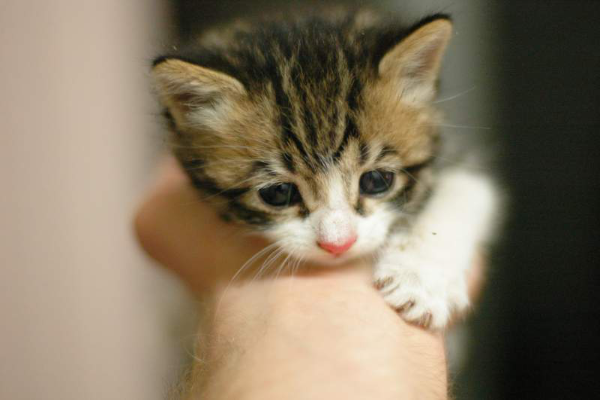

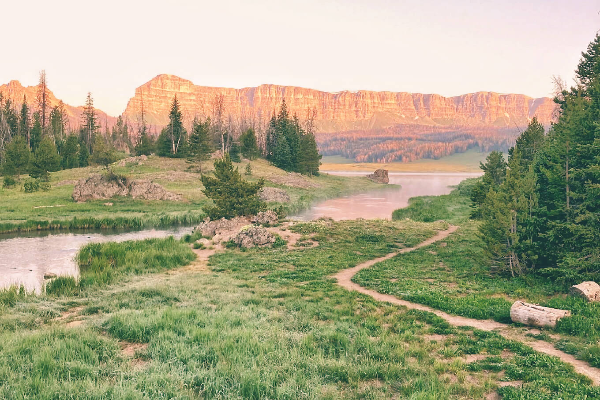

In [ ]:
images = []
for url in urls:
  image = io.imread(url)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  resized = cv2.resize(image, (600, 400))
  cv2_imshow(resized)
  images.append(resized)
  print('\n')

In [ ]:
def grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray)
    return gray

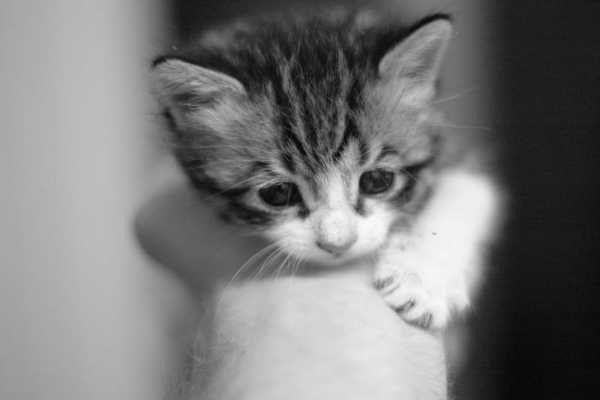

In [ ]:
gray = grayscale(images[0])

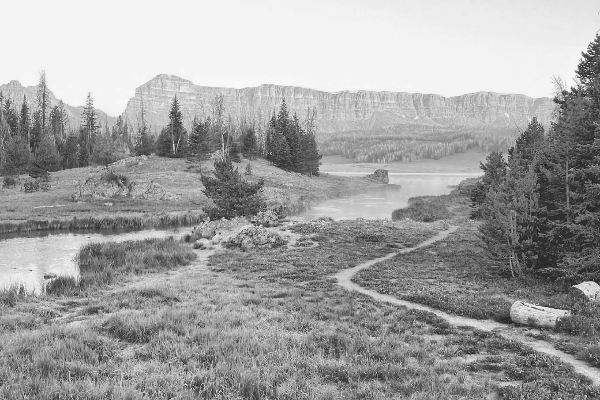

In [ ]:
gray2 = grayscale(images[1])

## CONVERT TO BINARY IMAGE

In [ ]:
def convert_to_binary(image):
  r,c = image.shape
  for i in range(r):
    for j in range(c):
      if(image[i][j] < 128):
        image[i][j] = 0
      else:
        image[i][j] = 255
  cv2_imshow(image)
  return image

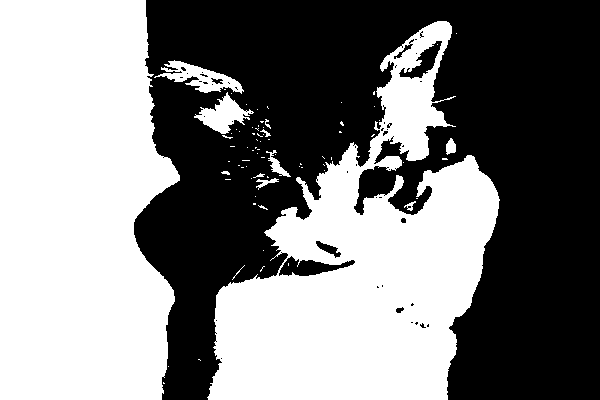

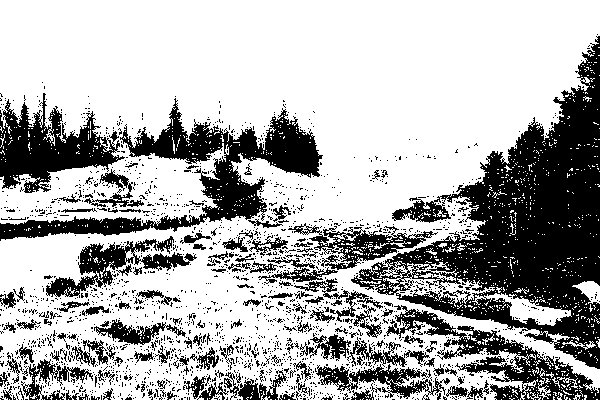

In [ ]:
bin_img_1 = convert_to_binary(gray)
bin_img_2 = convert_to_binary(gray2)

## 1. Dilation on binary image, Save the output as O1

In [ ]:
segment = np.array([[255,0,255],[0,0,0],[255,0,255]])

In [ ]:
rs, cs= segment.shape
print(rs, cs)
for i in range(0, rs):
  for j in range(0, cs):
    print(segment[i])
    print(segment[i][j])

3 3
[255   0 255]
255
[255   0 255]
0
[255   0 255]
255
[0 0 0]
0
[0 0 0]
0
[0 0 0]
0
[255   0 255]
255
[255   0 255]
0
[255   0 255]
255


In [ ]:
def dilation(image, segment):
  r,c = image.shape
  rs, cs = segment.shape
  result = np.zeros([r,c])
  flag = 0
  startR = rs - 1
  startC = cs - 1
  endR = r - startR
  endC = c - startC
  for i in range(startR, endR):
    for j in range(startC, endC):
      result[i][j] = 255
      for k1 in range(0, rs):
        for k2 in range(0, cs):

          if(image[i+k1][j+k2] == 0 and segment[k1][k2] == 0):
            result[i][j] = 0
            flag = 1
            break

        if(flag == 1):
          flag = 0
          break
  print("\n\nORIGINAL IMAGE:")
  cv2_imshow(image)
  print("\n\nDILATED IMAGE:")
  cv2_imshow(result)
  return result

In [ ]:
x = np.array([[0,1,1,0]])

In [ ]:
dilation(x, segment)



ORIGINAL IMAGE:




DILATED IMAGE:


array([[0., 0., 0., 0.]])



ORIGINAL IMAGE:


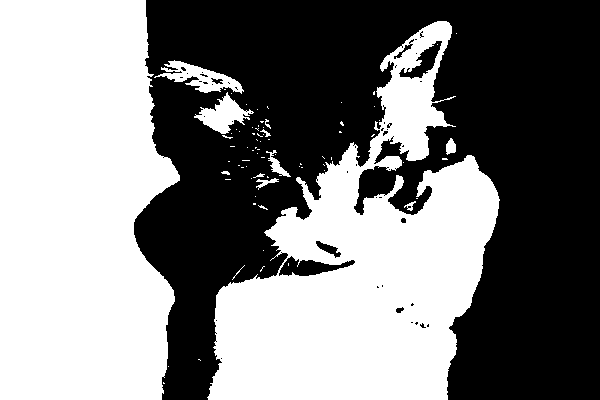



DILATED IMAGE:


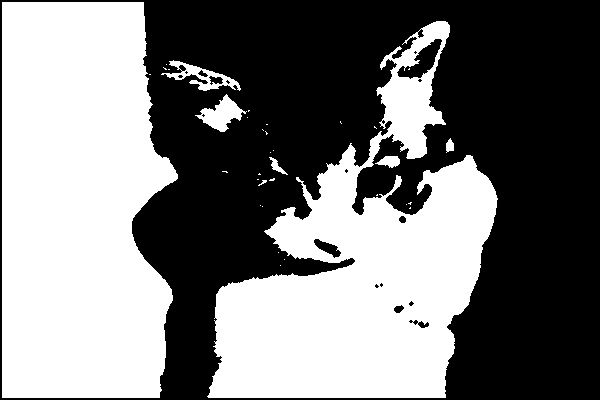

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0., 255., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0., 255., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [ ]:
dilation(bin_img_1, segment)

## 2. Erosion on binary image, Save the output as O2

In [ ]:
def erosion(image, segment):
  r,c = image.shape
  rs, cs = segment.shape
  result = np.zeros([r,c])
  flag = 0
  startR = rs - 1
  startC = cs - 1
  endR = r - startR
  endC = c - startC
  for i in range(startR, endR):
    for j in range(startC, endC):
      result[i][j] = 0
      for k1 in range(0, rs):
        for k2 in range(0, cs):

          if(image[i+k1][j+k2] != 0 and segment[k1][k2] == 0):
            result[i][j] = 255
            flag = 1
            break

        if(flag == 1):
          flag = 0
          break
  print("\n\nORIGINAL IMAGE:")
  cv2_imshow(image)
  print("\n\nERODED IMAGE:")
  cv2_imshow(result)
  return result



ORIGINAL IMAGE:


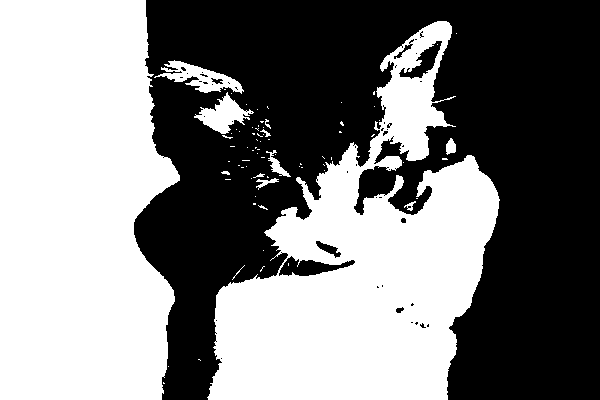



ERODED IMAGE:


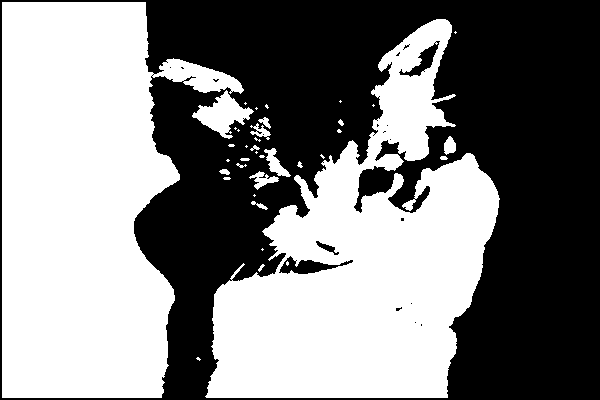

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0., 255., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0., 255., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [ ]:
erosion(bin_img_1, segment)

## 3. Consider another image with two object bridged by thin line.
Convert into binary image, Save the output as O3

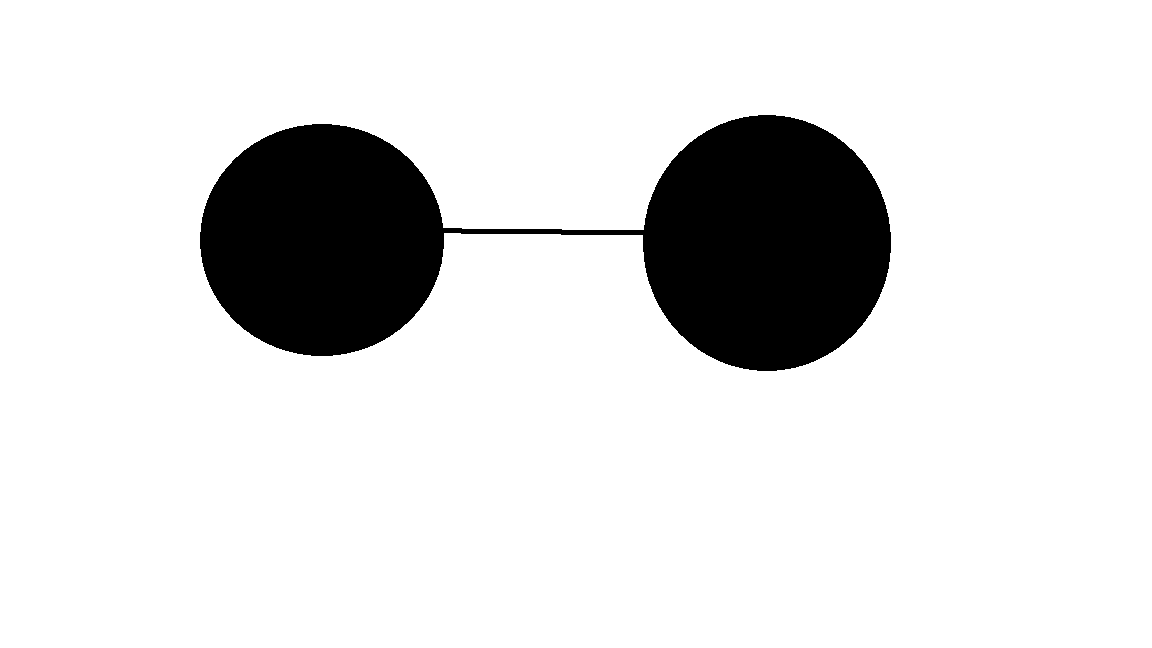

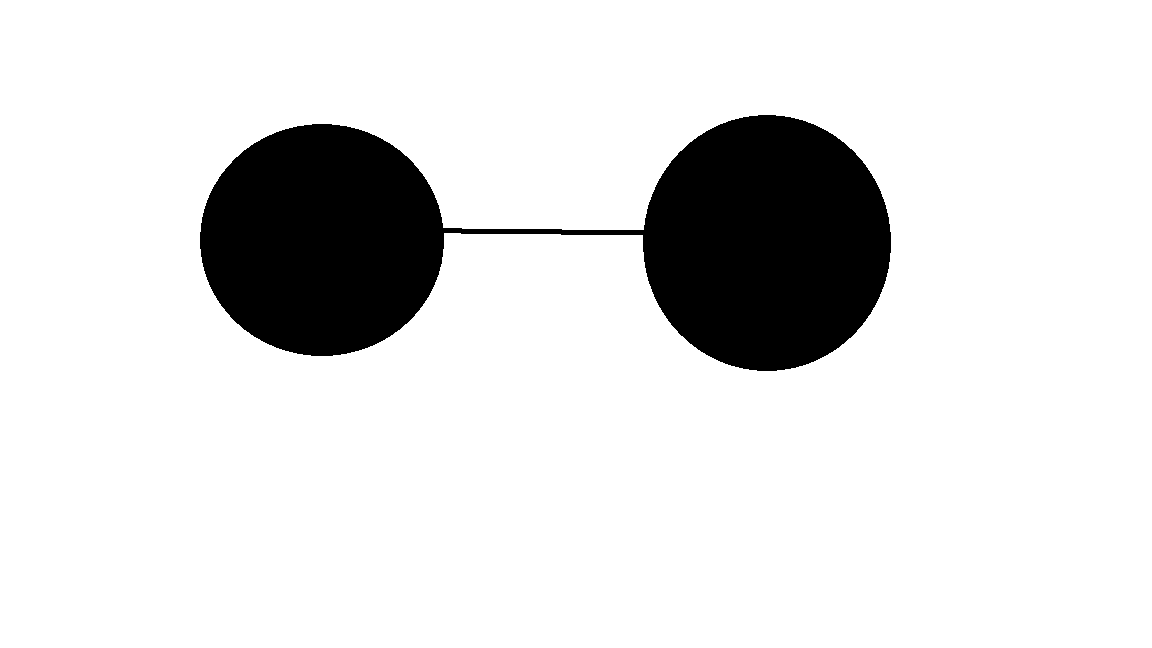

In [ ]:
image3 = cv2.imread("image3.png")
gray3 = grayscale(image3)
bin_img_3 = convert_to_binary(gray3)

## 4. To the O3, apply opening, Save the output as O4

In [ ]:
def opening(image, segment):
  image = erosion(image, segment)
  image = dilation(image, segment)
  print("\n\n\n FINAL:")
  cv2_imshow(image)
  return image



ORIGINAL IMAGE:


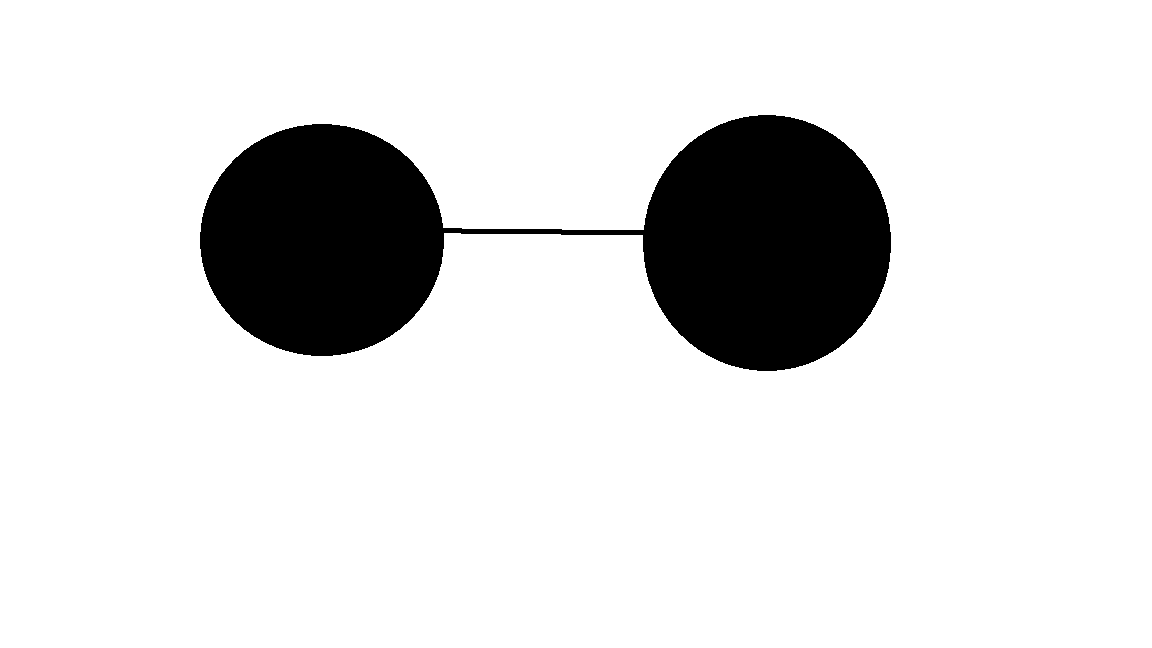



ERODED IMAGE:


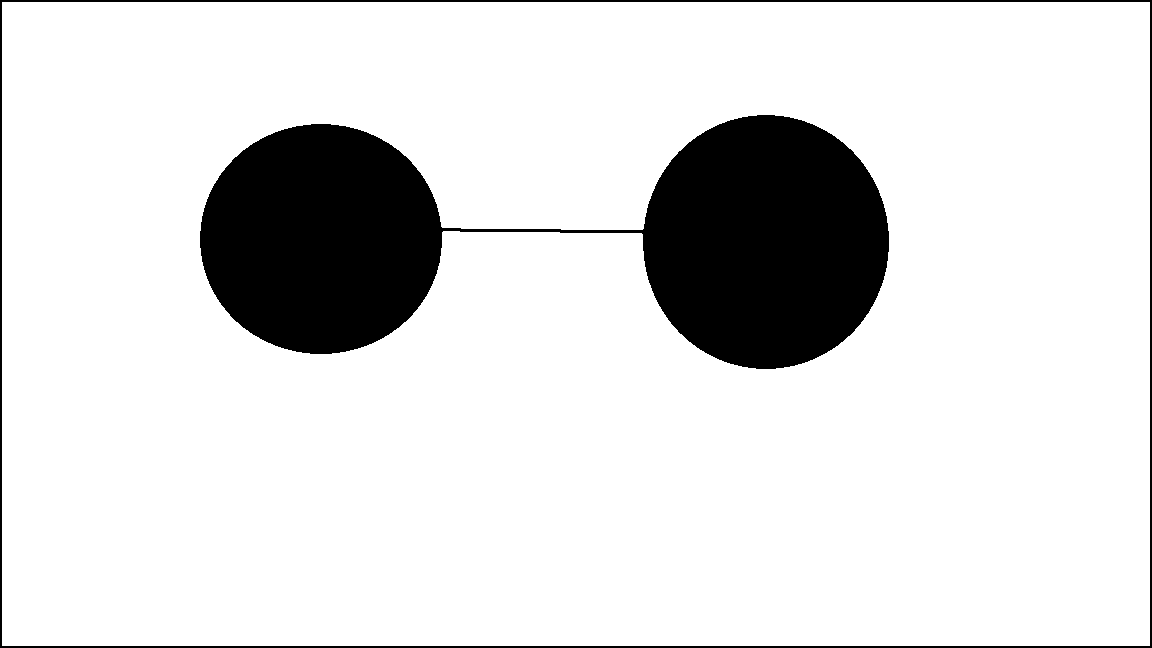



ORIGINAL IMAGE:


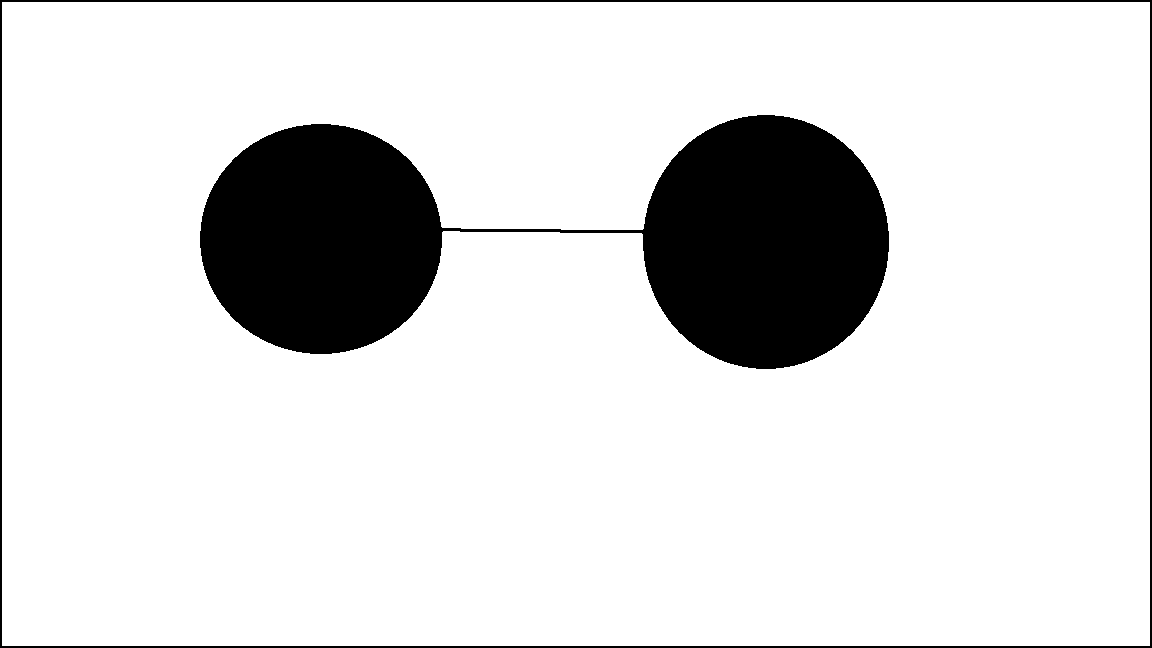



DILATED IMAGE:


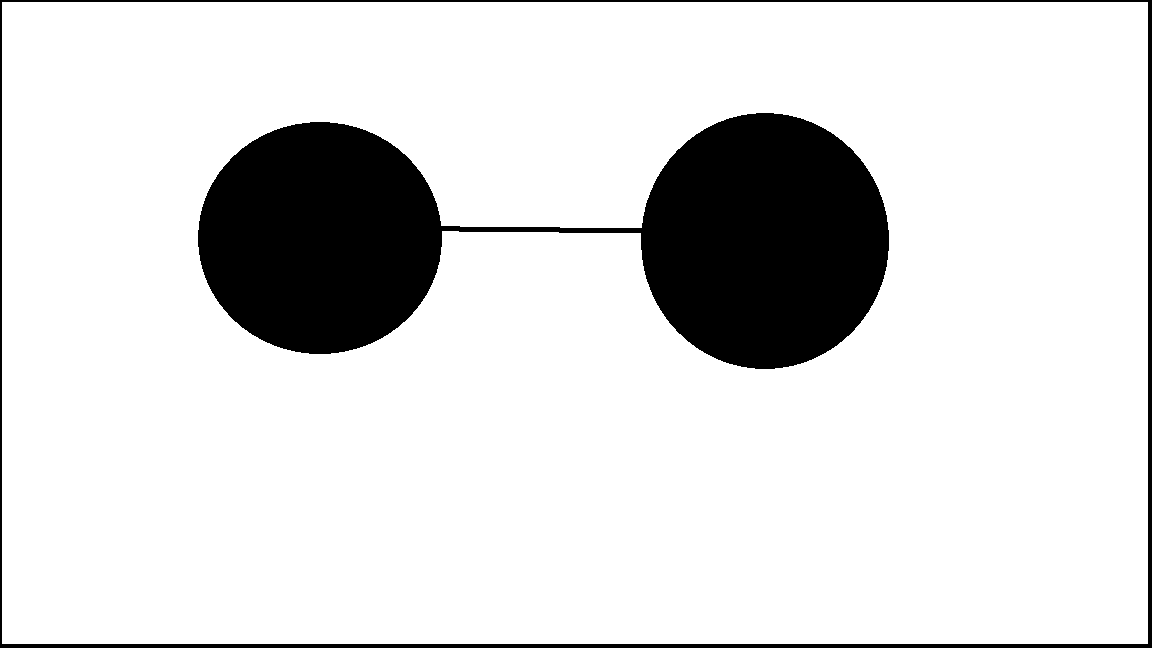




 FINAL:


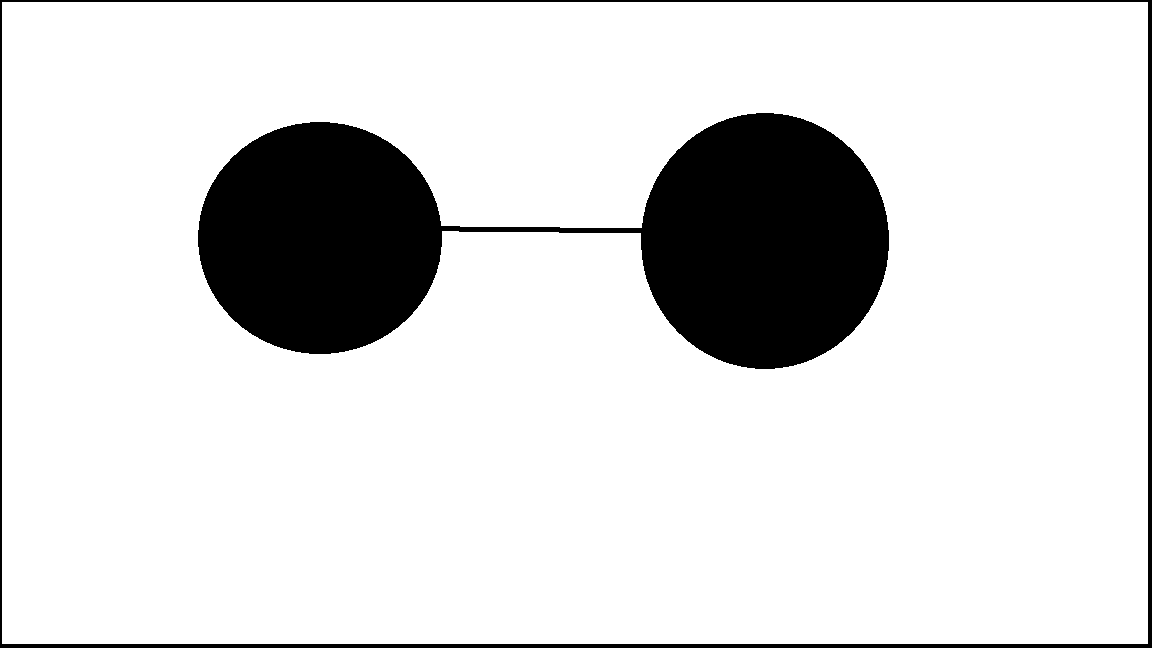

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0., 255., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [ ]:
opening(bin_img_3, segment)

## 5. To the O3, apply closing, Save the output as O5

In [ ]:
def closing(image, segment):
  image = dilation(image, segment)
  image = erosion(image, segment)
  print("\n\n\n FINAL:")
  cv2_imshow(image)
  return image



ORIGINAL IMAGE:


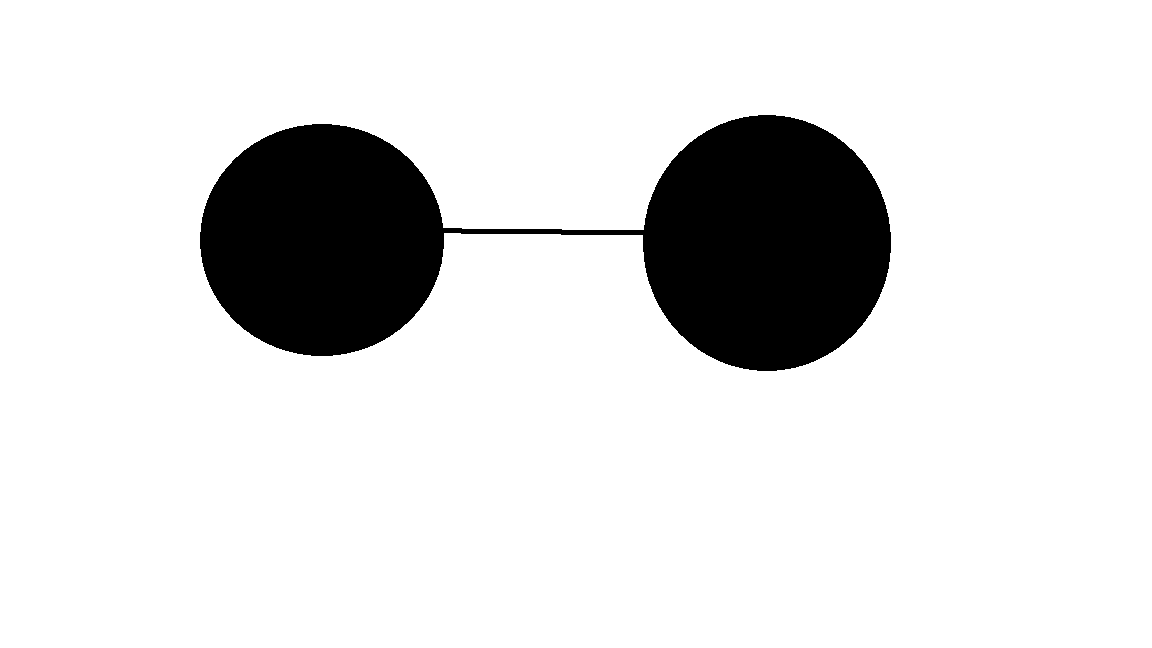



DILATED IMAGE:


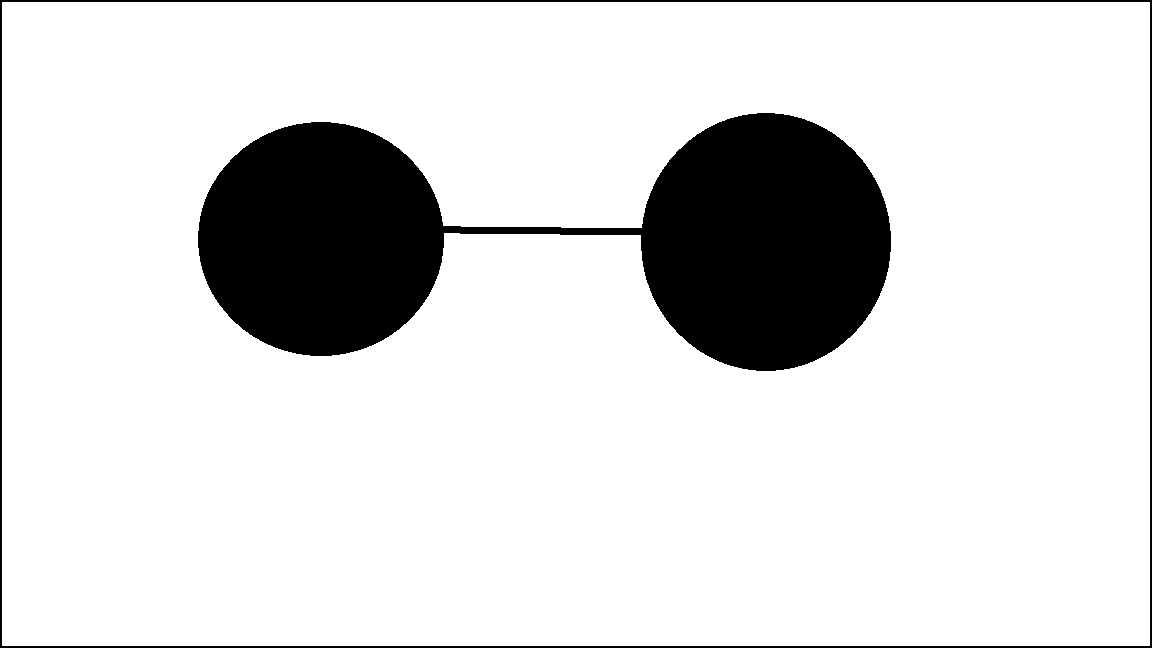



ORIGINAL IMAGE:


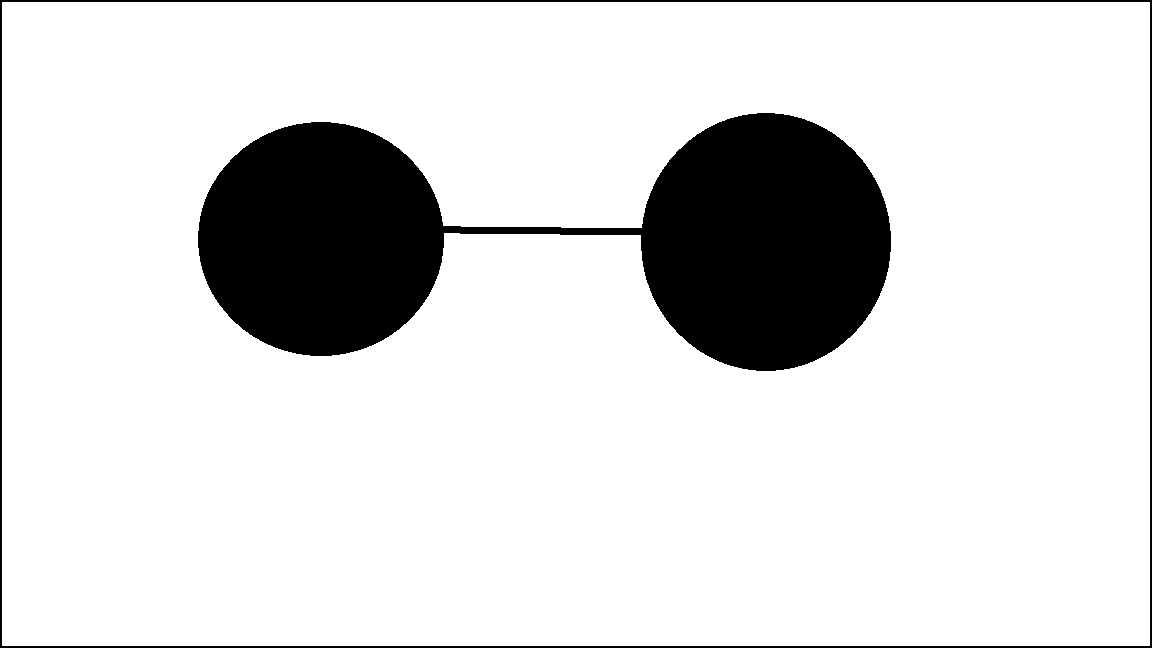



ERODED IMAGE:


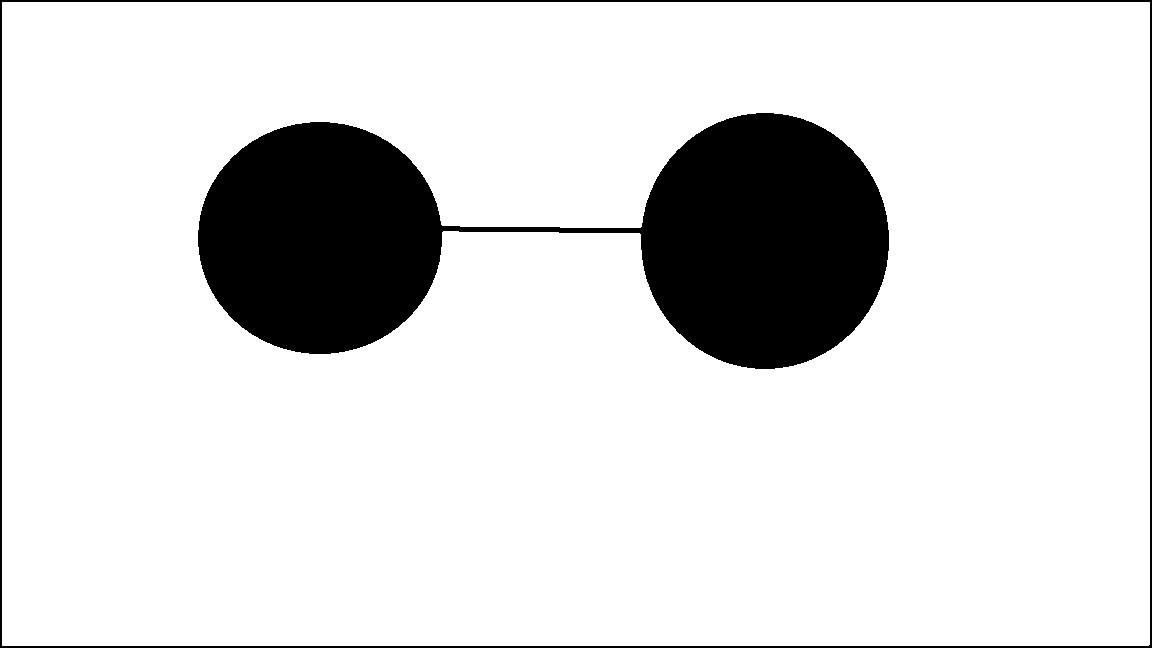




 FINAL:


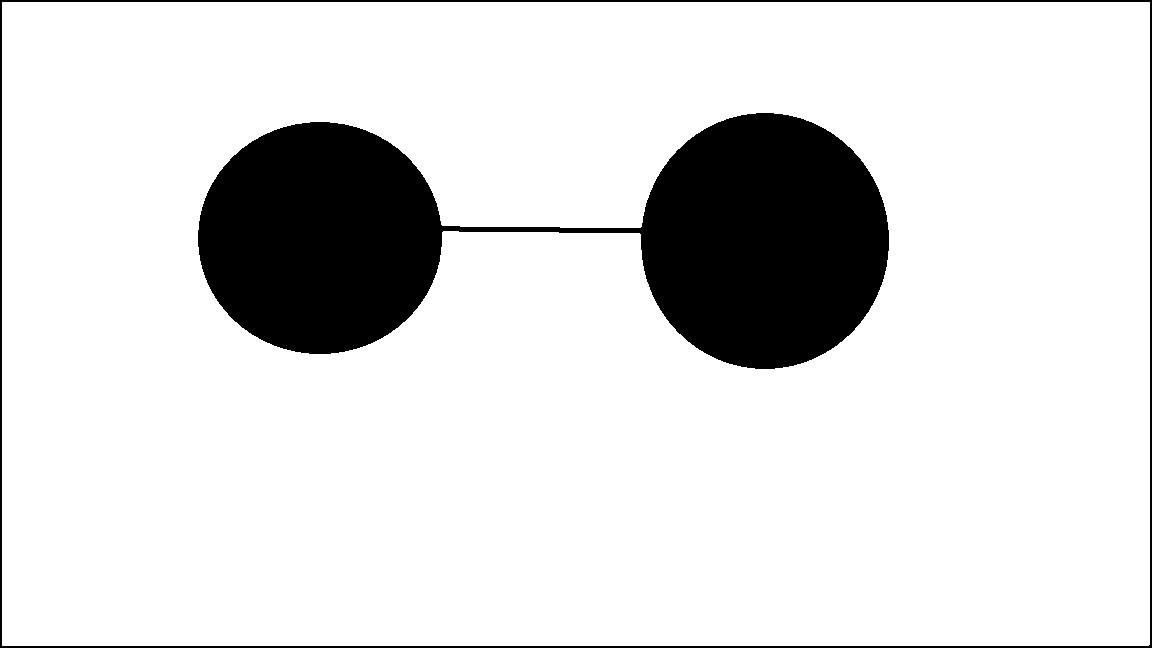

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0., 255., ..., 255.,   0.,   0.],
       ...,
       [  0.,   0., 255., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [ ]:
closing(bin_img_3, segment)

## Using In-Built OpenCV functions

In [ ]:
kernel = np.ones((3, 3), np.uint8)

In [ ]:
img_erosion = cv2.erode(bin_img_1, kernel, iterations=1)

In [ ]:
img_dilation = cv2.dilate(bin_img_1, kernel, iterations=1)

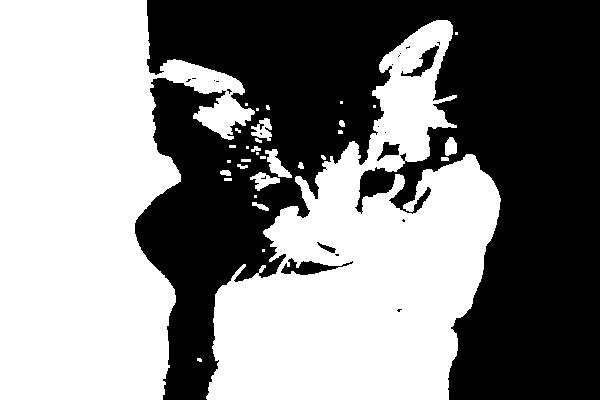

In [ ]:
cv2_imshow(img_dilation)

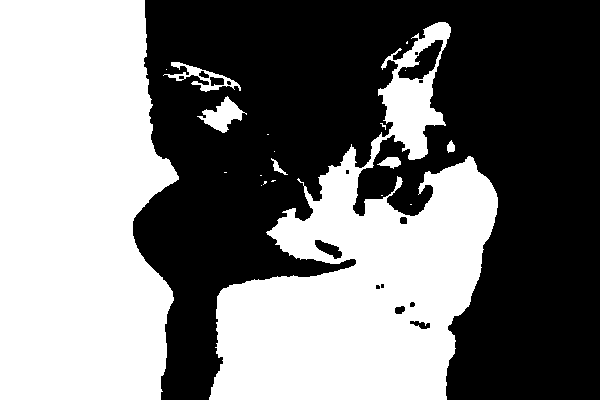

In [ ]:
cv2_imshow(img_erosion)

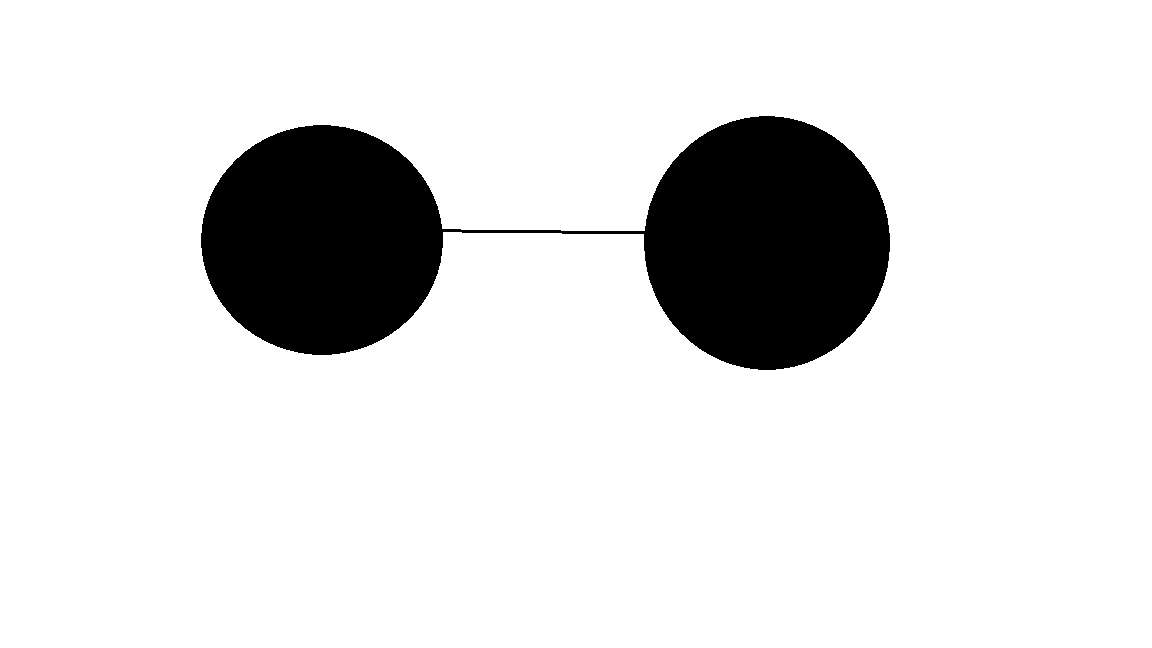

In [ ]:
opening_img = cv2.erode(bin_img_3, kernel, iterations=1)
opening_img = cv2.dilate(bin_img_3, kernel, iterations=1)
cv2_imshow(opening_img)

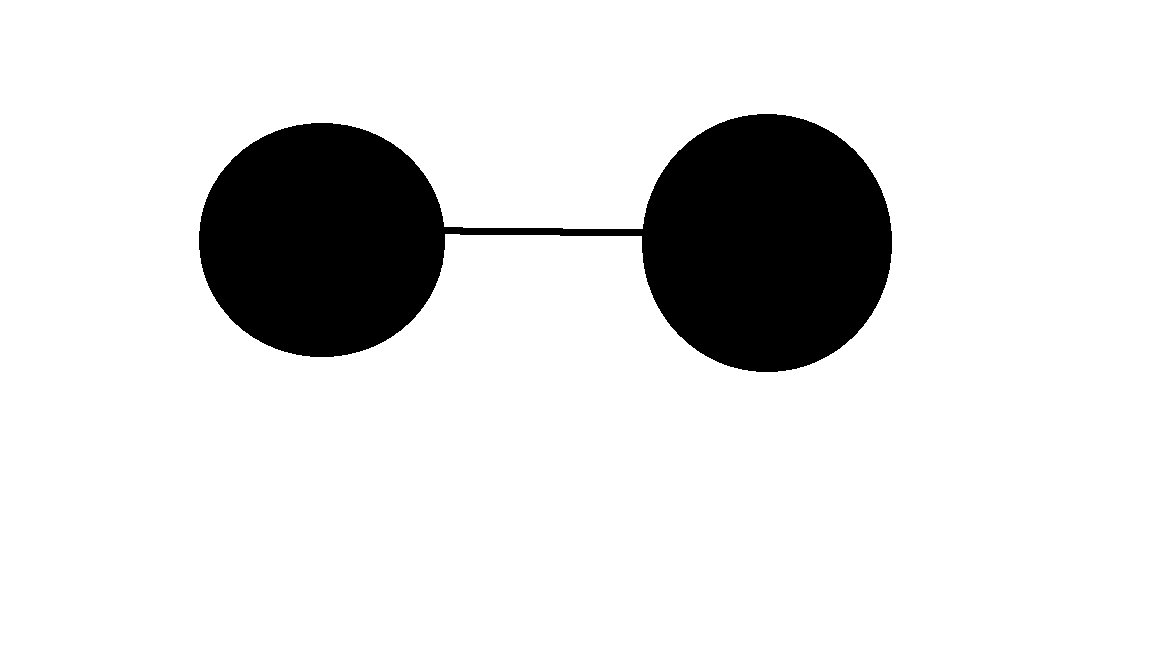

In [ ]:
closing_img = cv2.dilate(bin_img_3, kernel, iterations=1)
closing_img = cv2.erode(bin_img_3, kernel, iterations=1)
cv2_imshow(closing_img)